<a href="https://colab.research.google.com/github/ykitaguchi77/AdvancedPytorch_Colab/blob/master/pytorch_lightning_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install timm --q
!pip install icrawler --q
!!pip install pytorch-lightning --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.7 MB/s eta 0:00:00


['\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/774.6 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b61.4/774.6 kB\x1b \x1b2.0 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━\x1b \x1b358.4/774.6 kB\x1b \x1b5.7 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━\x1b \x1b747.5/774.6 kB\x1b \x1b7.4 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b774.6/774.6 kB\x1b \x1b6.7 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25h\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/805.2 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━\x1b \x1b491.5/805.2 kB\x1b \x1b15.3 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1

In [34]:
import torch
import timm
import numpy as np
from icrawler.builtin import GoogleImageCrawler
from icrawler.builtin import BingImageCrawler
import os
import shutil

from torch.utils.data import DataLoader

import pytorch_lightning as pl
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# 画像を取得する

In [38]:
crawler = BingImageCrawler(
    storage={'root_dir': 'images/dog'})
crawler.crawl(keyword='dog', max_num=300)

ERROR:downloader:Exception caught when downloading file http://wallpaper.1000webgames.com/wallpapers/lhasa_apso_dog_wallpaper-1024x768.jpg, error: HTTPConnectionPool(host='wallpaper.1000webgames.com', port=80): Max retries exceeded with url: /wallpapers/lhasa_apso_dog_wallpaper-1024x768.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7ec10446c4f0>: Failed to resolve 'wallpaper.1000webgames.com' ([Errno -2] Name or service not known)")), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file http://wallpaper.1000webgames.com/wallpapers/lhasa_apso_dog_wallpaper-1024x768.jpg, error: HTTPConnectionPool(host='wallpaper.1000webgames.com', port=80): Max retries exceeded with url: /wallpapers/lhasa_apso_dog_wallpaper-1024x768.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7ec10446c1f0>: Failed to resolve 'wallpaper.1000webgames.com' ([Errno -2] Name or service not known)")), remaining retry times: 

In [39]:
crawler = BingImageCrawler(
    storage={'root_dir': 'images/cat'})
crawler.crawl(keyword='cat', max_num=300)

ERROR:downloader:Response status code 404, file https://novacatclinic.com/wp-content/uploads/2019/03/IMG_8668.jpg
ERROR:downloader:Response status code 403, file https://external-preview.redd.it/i5CeFNrTceC57C_VKC8yT7eXN7iY0M7c4oI9JOJ1nFg.jpg
ERROR:downloader:Response status code 403, file https://data.whicdn.com/images/338786605/original.jpg
ERROR:downloader:Exception caught when downloading file https://serik.red/images/cat.jpg, error: HTTPSConnectionPool(host='serik.red', port=443): Max retries exceeded with url: /images/cat.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7ec10172b310>, 'Connection to serik.red timed out. (connect timeout=5)')), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://serik.red/images/cat.jpg, error: HTTPSConnectionPool(host='serik.red', port=443): Max retries exceeded with url: /images/cat.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7ec10436461

In [42]:
import os
import shutil

def remove_if_exists(path):
    """指定されたパスが存在する場合に削除する"""
    if os.path.exists(path):
        shutil.rmtree(path)

def create_folders(base_path):
    """必要なフォルダ構造を作成する"""
    folders_to_create = [
        'train/cat', 'train/dog',
        'valid/cat', 'valid/dog',
        'test/cat', 'test/dog'
    ]

    for folder in folders_to_create:
        os.makedirs(os.path.join(base_path, folder), exist_ok=True)

def split_images_into_folders(base_path, class_name, ratio=(0.7, 0.2, 0.1)):
    """画像を指定の比率で分割する"""
    image_list = os.listdir(os.path.join(base_path, class_name))
    total_images = len(image_list)

    train_count = int(total_images * ratio[0])
    valid_count = int(total_images * ratio[1])

    train_images = image_list[:train_count]
    valid_images = image_list[train_count:train_count + valid_count]
    test_images = image_list[train_count + valid_count:]

    for image in train_images:
        shutil.copy(os.path.join(base_path, class_name, image), os.path.join(base_path, 'train', class_name))

    for image in valid_images:
        shutil.copy(os.path.join(base_path, class_name, image), os.path.join(base_path, 'valid', class_name))

    for image in test_images:
        shutil.copy(os.path.join(base_path, class_name, image), os.path.join(base_path, 'test', class_name))

def print_image_counts(base_path):
    """それぞれのフォルダ内の画像数を表示する"""
    folders_to_check = [
        'train/cat', 'train/dog',
        'valid/cat', 'valid/dog',
        'test/cat', 'test/dog'
    ]

    for folder in folders_to_check:
        image_count = len(os.listdir(os.path.join(base_path, folder)))
        print(f"{folder}: {image_count} images")

# 既存のフォルダを削除
base_path = 'images'
remove_if_exists(os.path.join(base_path, 'train'))
remove_if_exists(os.path.join(base_path, 'valid'))
remove_if_exists(os.path.join(base_path, 'test'))

# フォルダ構造を作成
create_folders(base_path)

# 画像を分割
split_images_into_folders(base_path, 'cat')
split_images_into_folders(base_path, 'dog')

# 画像数を一覧表示
print_image_counts(base_path)


train/cat: 161 images
train/dog: 159 images
valid/cat: 46 images
valid/dog: 45 images
test/cat: 24 images
test/dog: 24 images


In [ ]:
!ls -lR images

# データローダ・データセットの作成

In [43]:
from timm.data import create_dataset, create_loader
from timm.data.transforms_factory import create_transform

In [53]:
dataset_train = create_dataset('train', root="./images/train", class_map={'dog':0, 'cat':1}, transform=create_transform(224))
dataset_valid = create_dataset('valid', root="./images/valid", class_map={'dog':0, 'cat':1}, transform=create_transform(224))
dataset_test = create_dataset('test', root="./images/test", class_map={'dog':0, 'cat':1}, transform=create_transform(224))

In [59]:
dataloader_train = DataLoader(dataset_train, batch_size=16, shuffle=True)
dataloader_valid = DataLoader(dataset_valid, batch_size=8, shuffle=False)
dataloader_test = DataLoader(dataset_test, batch_size=1, shuffle=False)

1

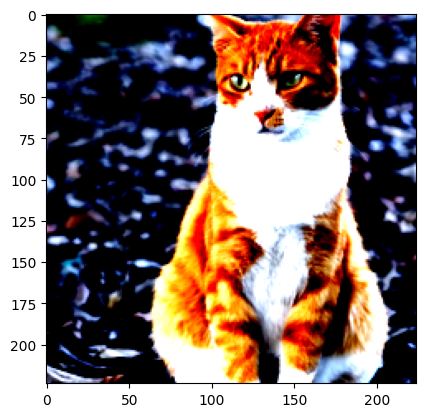

In [55]:
import matplotlib.pyplot as plt
img, label = dataset_train[0]
plt.imshow(img.permute(1,2,0))
label

In [47]:
# 確認
for X, y in dataloader_valid:
  print(y)

tensor([1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0])


# パラメータ設定

In [56]:
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# LightningModuleを定義

In [50]:
class myModule(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = timm.create_model('resnet18', pretrained=True, num_classes=2)
        self.loss_fn = torch.nn.CrossEntropyLoss()
        self.training_step_outputs = []
        self.validation_step_outputs = []

    def training_step(self, batch, batch_idx):
        x, y = batch
        pred = self.model(x)
        loss = self.loss_fn(pred, y)
        self.training_step_outputs.append(loss)
        return loss

    def on_train_epoch_end(self):
        epoch_mean = torch.stack(self.training_step_outputs).mean()
        self.log("train_loss", epoch_mean, prog_bar=True)
        self.training_step_outputs.clear()

    def validation_step(self, batch, batch_idx):
        x, y = batch
        pred = self.model(x)
        loss = self.loss_fn(pred, y)
        self.validation_step_outputs.append(loss)
        return loss

    def on_validation_epoch_end(self):
        epoch_mean = torch.stack(self.validation_step_outputs).mean()
        self.log("valid_loss", epoch_mean, prog_bar=True)
        self.validation_step_outputs.clear()

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=0.001, weight_decay=0.0001)



# 学習

In [51]:
module = myModule()
trainer = pl.Trainer(max_epochs=num_epochs)

trainer.fit(model=module,
            train_dataloaders = dataloader_train,
            val_dataloaders = dataloader_valid)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type             | Params
---------------------------------------------
0 | model   | ResNet           | 11.2 M
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (20) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


# 評価

In [57]:
# modelの部分的だけ取り出し
model = module.model

In [60]:
from tqdm import tqdm
model.to(device)
model.eval()
y_pred = []
y_gt = []
for batch in tqdm(dataloader_test):
    inputs, targets = batch
    with torch.no_grad() :
      outputs = model(inputs.to(device))
    y_gt += targets.tolist()
    y_pred += outputs.argmax(axis=1).tolist()


100%|██████████| 48/48 [00:01<00:00, 30.43it/s]


In [ ]:
y_pred, y_gt

# 指標の計算

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
confusion_matrix(y_gt, y_pred)

In [ ]:
acc, recall, prec, fs = accuracy_score(y_gt, y_pred), recall_score(y_gt, y_pred), precision_score(y_gt, y_pred), f1_score(y_gt, y_pred)
print(f"acc={acc}, recall={recall}, precition = {prec},  f-score={fs}")

# ミス画像の表示

In [28]:
for idx, (x, y) in enumerate(zip(y_pred, y_gt)):
  if x != y :
    img, label = dataset_valid[idx]
    print("gt", y)
    plt.imshow(img.permute(1,2,0))
    plt.show()